In [2]:
#Importation des bibliothèques
import pandas as pd # Manipulation des données 
import matplotlib.pyplot as plt # Visualisation 



In [4]:
# Charger les données
pd.set_option("display.max_columns",None)
data=pd.read_csv("documents/Online_Sales.csv")
df=data.copy()

In [6]:
# Affichage des premières lignes
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
df.shape

(240, 9)

In [10]:
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [16]:
duplicates = df.duplicated() # Vérifier les duplicatas
print(duplicates)

nombre_duplicatas = duplicates.sum() # Compter le nombre de duplicates
print(f"Nombre de duplicatas : {nombre_duplicatas}")

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool
Nombre de duplicatas : 0


In [18]:
# Compter les valeurs nulles par colonne
null_counts = df.isnull().sum()

# Calculer la proportion de valeurs nulles 
proportion_nulls = (null_counts / df.shape[0]) * 100 

# Afficher la proportion de valeurs nulles 
print(proportion_nulls)

Transaction ID      0.0
Date                0.0
Product Category    0.0
Product Name        0.0
Units Sold          0.0
Unit Price          0.0
Total Revenue       0.0
Region              0.0
Payment Method      0.0
dtype: float64


In [20]:
df.drop(["Transaction ID"], axis=1, inplace=True)

In [22]:
# Afficher les colonnes numériques 

display(df.select_dtypes(int).columns)
df.select_dtypes(float).columns

Index(['Units Sold'], dtype='object')

Index(['Unit Price', 'Total Revenue'], dtype='object')

In [24]:
# Colonnes numériques à vérifier 
cols_to_check = [ "Unit Price", "Total Revenue"]

# Vérifier que toutes les colonnes sont numériques
numeric_cols_to_check = df[cols_to_check].select_dtypes(include=['number']).columns

# Vérifier s'il y a des colonnes non numériques
non_numeric_cols = [col for col in cols_to_check if col not in numeric_cols_to_check]

if non_numeric_cols:
    print(f"Les colonnes suivantes ne sont pas numériques et seront ignorées : {non_numeric_cols}")

# Fonction pour vérifier les valeurs négatives
def check_negative_values(df, columns_to_check):
    negative_values = df[columns_to_check].lt(0).sum()
    return negative_values

# Appeler la fonction avec seulement les colonnes numériques
negative_values_result = check_negative_values(df, numeric_cols_to_check)

# Afficher le résultat
print("Valeurs négatives par colonne :")
print(negative_values_result)

Valeurs négatives par colonne :
Unit Price       0
Total Revenue    0
dtype: int64


In [26]:
# Enregistrer le DataFrame nettoyé dans un nouveau fichier Excel
df.to_excel("online_sales_nettoye.xlsx", index=False)

In [28]:
# Ajouter une colonne 'Month' pour extraire le mois et l'année de la date
df['Month'] = df['Date'].dt.to_period('M')

In [30]:
df.head

<bound method NDFrame.head of           Date Product Category  \
0   2024-01-01      Electronics   
1   2024-01-02  Home Appliances   
2   2024-01-03         Clothing   
3   2024-01-04            Books   
4   2024-01-05  Beauty Products   
..         ...              ...   
235 2024-08-23  Home Appliances   
236 2024-08-24         Clothing   
237 2024-08-25            Books   
238 2024-08-26  Beauty Products   
239 2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                                  The Da Vinci Code           4       15.99   
4                            Neutrogena Skincare Set           1       89.99   
..                                               ...         ...     

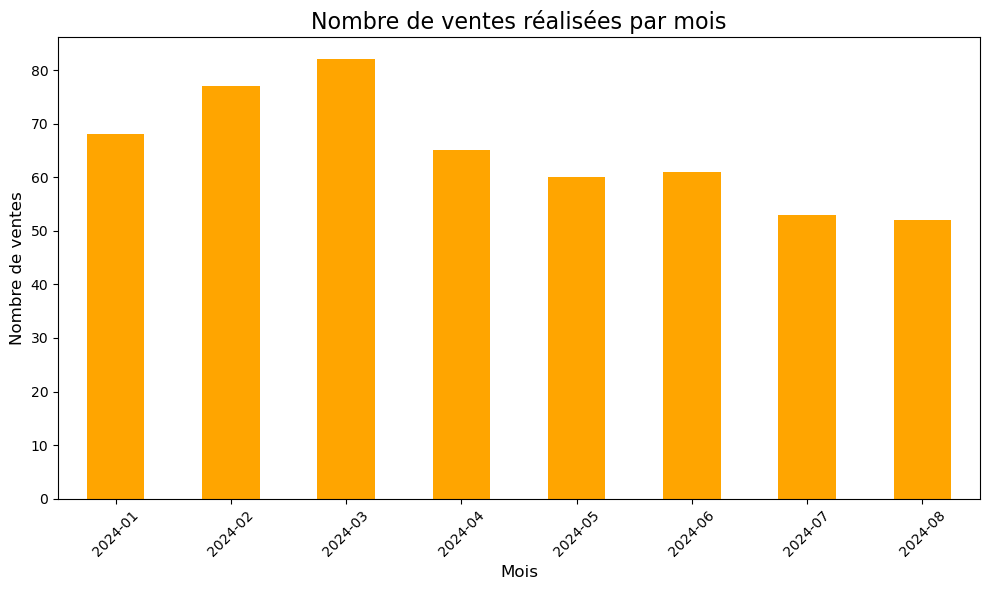

In [32]:
# Regrouper les données par mois et calculer le total des ventes (unit sold)
monthly_sales = df.groupby('Month')['Units Sold'].sum()

# Créer le graphique
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='orange')

# Ajouter des titres et des labels
plt.title('Nombre de ventes réalisées par mois', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de ventes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

Résultat : Mars est le mois où l'entreprise X a effectué le plus de vente en 2024. On constate qu'il y a une hausse des ventes en début d'année et une baisse après juin.